## Part A – Data Preparation

In [279]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [280]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head(10)

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168
5,73442.05848,21,High School,768,15,46,7226.574153,13968.147730,14188.800330,0.645516,1,0.759613
6,57819.04084,62,Bachelor,430,14,81,4836.263058,43456.201540,18221.086750,0.325910,2,0.248530
7,91882.97506,37,Bachelor,420,9,59,7949.263177,18869.300010,15163.018950,0.196676,4,0.974775
8,97274.70704,63,PhD,651,4,24,7160.577123,13426.761570,3065.652477,0.579068,2,0.228496
9,53758.11391,18,Bachelor,484,10,73,1764.187614,30247.502380,11167.862030,0.850699,4,0.862971


In [281]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [282]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [283]:
df.isnull().sum()

,0
Income,0
Age,0
Education,0
Credit_Score,0
Years_with_Bank,0
Transaction_Count,0
Balance,0
Loan_Approval_Amount,0
Credit_Card_Limit,0
Purchase_Frequency,0


In [284]:
df_encoded = df.copy()
#1. Ordinal mapping
ordinal_mappings = {
    'Education': {
        'High School': 0,
        'Bachelor': 1,
        'Master': 2,
        'PhD': 3
    },
}
for col, mapping in ordinal_mappings.items():
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].map(mapping).fillna(0).astype(int)

In [285]:
df.head(10)

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168
5,73442.05848,21,High School,768,15,46,7226.574153,13968.147730,14188.800330,0.645516,1,0.759613
6,57819.04084,62,Bachelor,430,14,81,4836.263058,43456.201540,18221.086750,0.325910,2,0.248530
7,91882.97506,37,Bachelor,420,9,59,7949.263177,18869.300010,15163.018950,0.196676,4,0.974775
8,97274.70704,63,PhD,651,4,24,7160.577123,13426.761570,3065.652477,0.579068,2,0.228496
9,53758.11391,18,Bachelor,484,10,73,1764.187614,30247.502380,11167.862030,0.850699,4,0.862971


In [286]:
sc = StandardScaler()
df_scaled = df.copy()

# Pilih kolom numerik yang relevan untuk scaling
selected_cols = [
    'Income',
    'Balance',
    'Transaction_Count',
    'Loan_Approval_Amount',
    'Credit_Card_Limit',
    'Credit_Score'
]

df_scaled_values = sc.fit_transform(df[selected_cols])
df_scaled = pd.DataFrame(df_scaled_values, columns=selected_cols)

# Lihat hasil
df_scaled.head()

,Income,Balance,Transaction_Count,Loan_Approval_Amount,Credit_Card_Limit,Credit_Score
0,0.179150,-1.058293,-0.260713,-1.606308,-0.861669,-0.389771
1,0.749977,1.619378,-0.748287,0.428724,-1.189034,1.345561
2,0.364249,0.670893,1.619930,-0.628469,-0.821645,-0.289172
3,0.165665,1.002068,0.993049,1.392847,-1.422533,1.691370
4,-0.250263,-1.547513,0.331341,1.628264,-0.083694,-0.974502


## Part B – Exploratory Data Analysis

/tmp/ipython-input-29213626.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




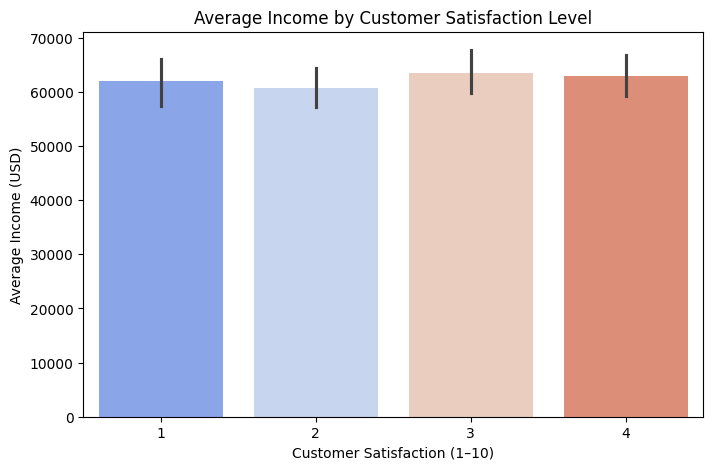

In [287]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='Customer_Satisfaction', y='Income', data=df, estimator='mean', palette='coolwarm')
plt.title('Average Income by Customer Satisfaction Level')
plt.xlabel('Customer Satisfaction (1–10)')
plt.ylabel('Average Income (USD)')
plt.show()


Pelanggan dengan tingkat kepuasan lebih tinggi cenderung memiliki pendapatan rata-rata yang sedikit lebih besar.
Ini menunjukkan bahwa nasabah dengan pendapatan tinggi lebih puas terhadap layanan bank, kemungkinan karena mereka mendapatkan produk atau layanan khusus (misalnya premium account atau benefit tambahan).

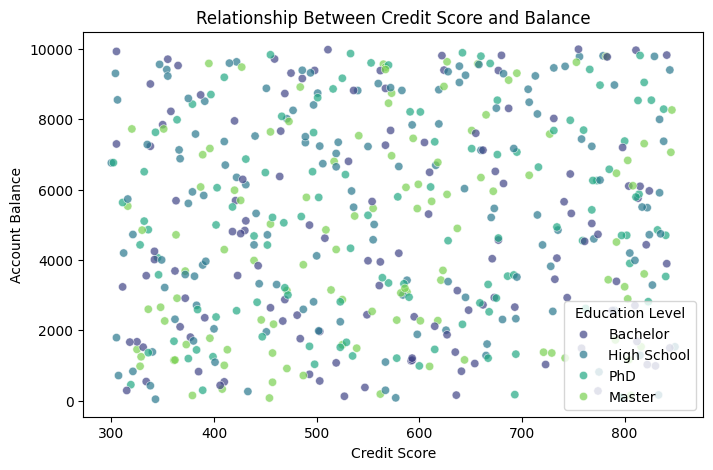

In [288]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Credit_Score', y='Balance', hue='Education', data=df, palette='viridis', alpha=0.7)
plt.title('Relationship Between Credit Score and Balance')
plt.xlabel('Credit Score')
plt.ylabel('Account Balance')
plt.legend(title='Education Level')
plt.show()


Grafik menunjukkan pola di mana nasabah dengan Credit Score lebih tinggi umumnya memiliki saldo (Balance) yang lebih besar.
Ini mengindikasikan bahwa stabilitas finansial dan kemampuan pengelolaan kredit berhubungan positif dengan jumlah saldo di rekening.

/tmp/ipython-input-184914199.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




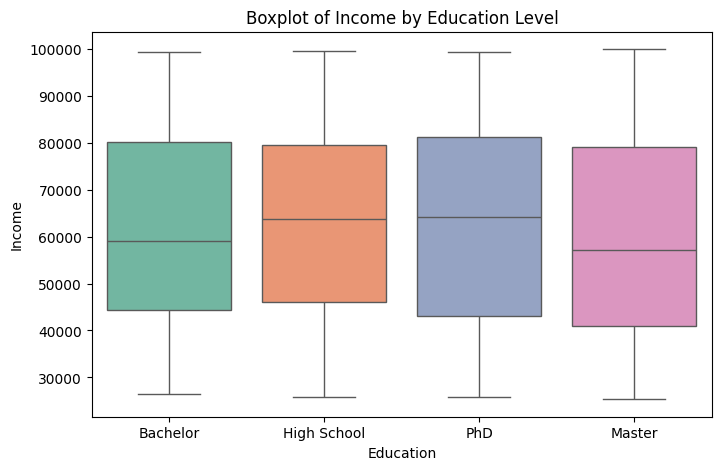

In [289]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Education', y='Income', data=df, palette='Set2')
plt.title('Boxplot of Income by Education Level')
plt.show()


Boxplot memperlihatkan bahwa rata-rata pendapatan meningkat seiring dengan jenjang pendidikan.
Nasabah dengan gelar Master dan PhD memiliki sebaran pendapatan lebih tinggi dibandingkan lulusan High School.

## Part C – Clustering Modeling


In [290]:
# get stastical information on the new dataset
df_scaled.describe()

,Income,Balance,Transaction_Count,Loan_Approval_Amount,Credit_Card_Limit,Credit_Score
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.158274e-16,-3.392842e-16,9.237056e-17,-1.918465e-16,4.085621e-17,2.593481e-16
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.687691e+00,-1.716418e+00,-1.653782e+00,-1.706699e+00,-1.723224e+00,-1.666120e+00
25%,-8.535233e-01,-8.547889e-01,-8.179404e-01,-8.524396e-01,-8.660940e-01,-8.739031e-01
50%,-3.347132e-02,-3.416637e-02,-1.692579e-02,8.970695e-03,1.912909e-02,-1.881200e-02
75%,8.033504e-01,8.593735e-01,8.189156e-01,9.102263e-01,8.839671e-01,7.985545e-01
max,1.723192e+00,1.683474e+00,1.759237e+00,1.725528e+00,1.681174e+00,1.785682e+00


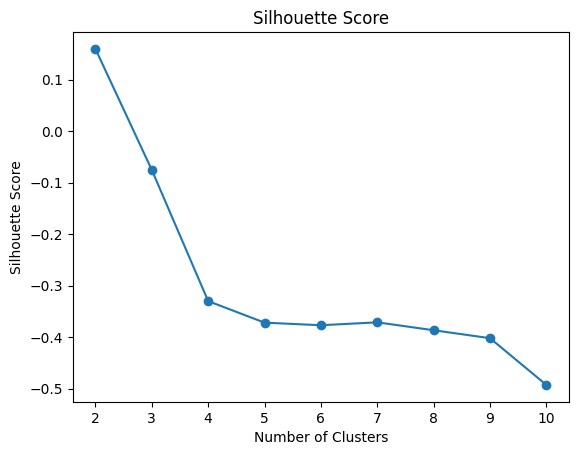

In [291]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single', metric='manhattan')
    cluster_labels = agglo_model.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

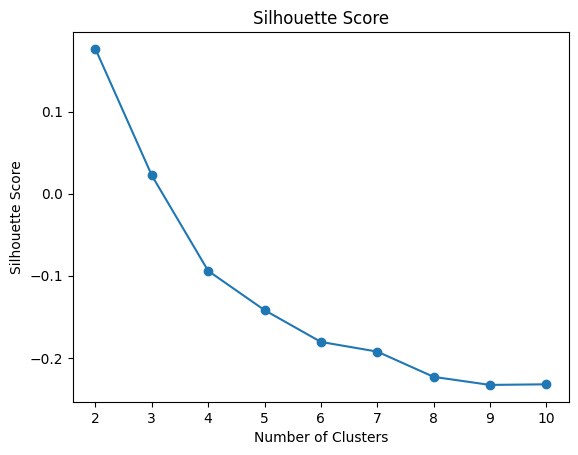

In [292]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single', metric='manhattan')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


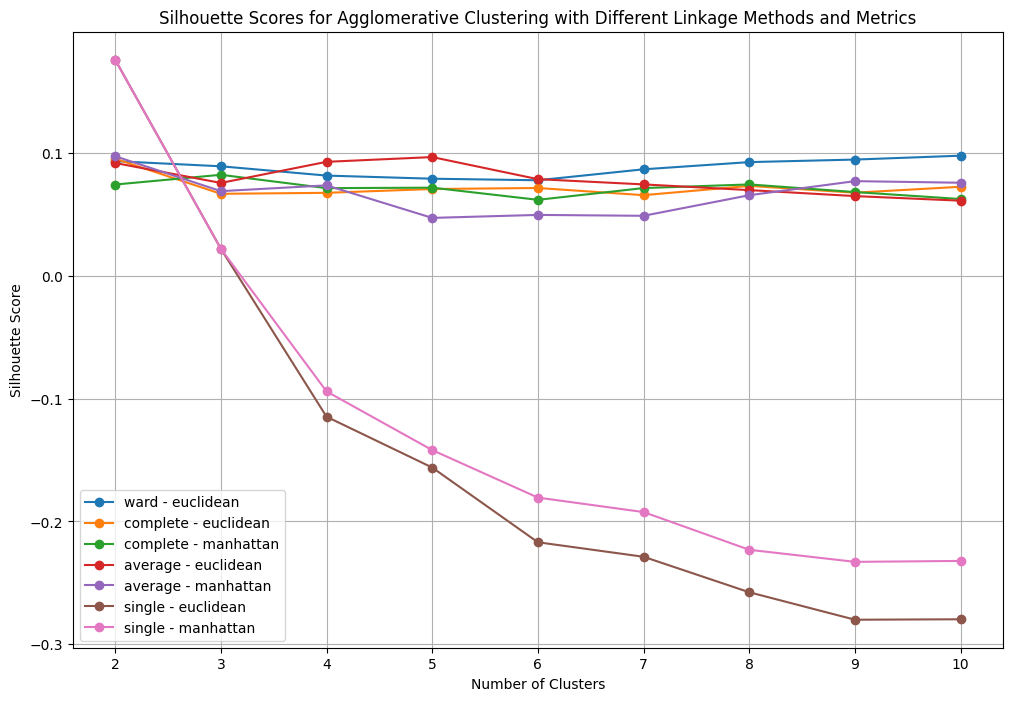

Best Silhouette Score: 0.17629984700455487
Optimal Number of Clusters: 2
Optimal Linkage Method: single
Optimal Metric: euclidean


In [293]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Skipping Ward linkage with Manhattan metric (not supported).


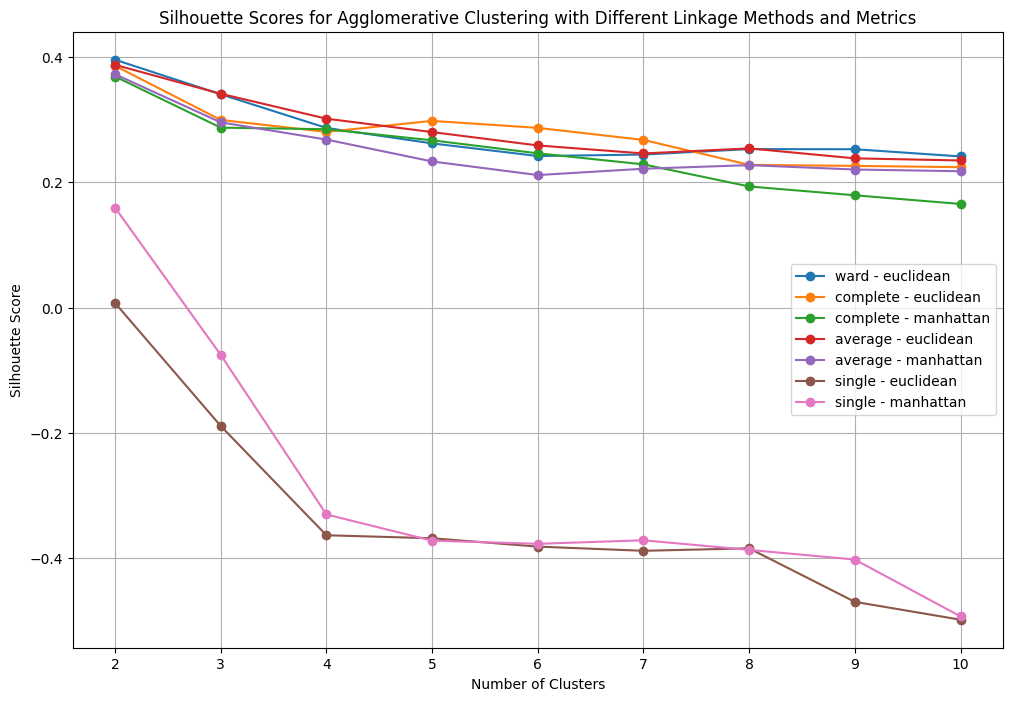

Best Silhouette Score: 0.39572706946177905
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


In [294]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_encoded)
            silhouette_avg = silhouette_score(df_encoded, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

In [295]:
# Hierarchical Clustering
agglo1 = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage=best_linkage,
    metric=best_metric
)
y_hc1 = agglo1.fit_predict(df_scaled)

agglo2 = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage=best_linkage,
    metric=best_metric
)
y_hc2 = agglo2.fit_predict(df_encoded)

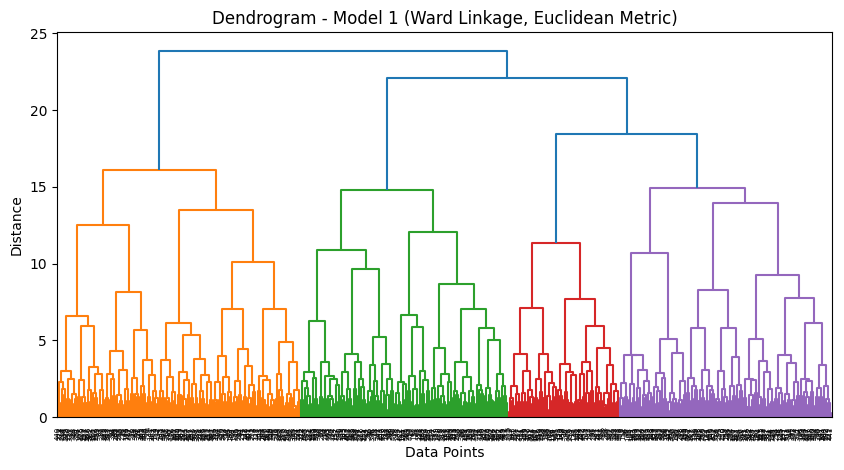

In [296]:
# Dendrogram - Model 1 (Best Parameters)
plt.figure(figsize=(10, 5))
Z1 = linkage(df_scaled, method=best_linkage, metric=best_metric)
dendrogram(Z1)
plt.title(f'Dendrogram - Model 1 ({best_linkage.title()} Linkage, {best_metric.title()} Metric)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

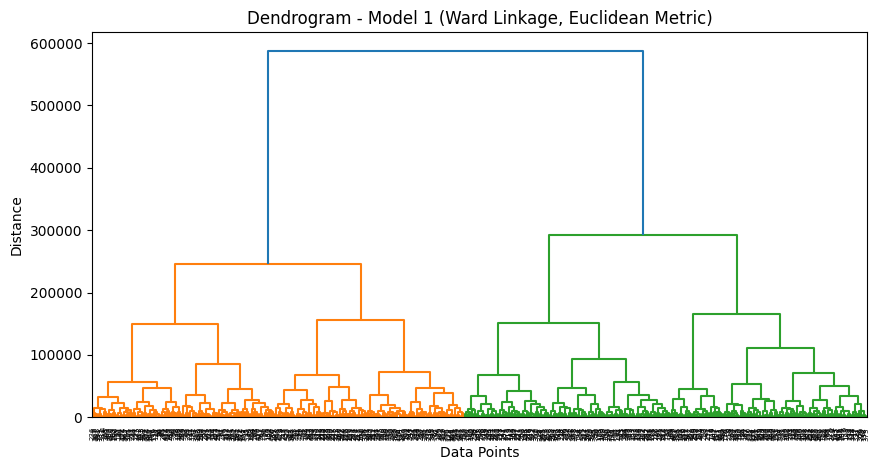

In [297]:
# Dendrogram - Model 1 (Best Parameters)
plt.figure(figsize=(10, 5))
Z1 = linkage(df_encoded, method=best_linkage, metric=best_metric)
dendrogram(Z1)
plt.title(f'Dendrogram - Model 1 ({best_linkage.title()} Linkage, {best_metric.title()} Metric)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [298]:
print("Agglomerative Clustering Models fitted successfully.")
print(f"Model 1 → {best_linkage} linkage, {best_metric} metric, {n_clusters} clusters.")

Agglomerative Clustering Models fitted successfully.
Model 1 → ward linkage, euclidean metric, 10 clusters.


In [299]:
# Add the cluster labels to the original data
df_scaled['Agglo'] = y_hc1
df_encoded['Agglo'] = y_hc2

In [300]:
# Analyze the clusters with the original (unscaled) data
df_encoded.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Agglo
0,66161.01279,57,1,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0
1,78639.20248,60,0,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0
2,70207.25321,46,0,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0
3,65866.23872,42,0,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0
4,56774.10995,36,1,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1


In [301]:
df_scaled.head()

,Income,Balance,Transaction_Count,Loan_Approval_Amount,Credit_Card_Limit,Credit_Score,Agglo
0,0.179150,-1.058293,-0.260713,-1.606308,-0.861669,-0.389771,0
1,0.749977,1.619378,-0.748287,0.428724,-1.189034,1.345561,0
2,0.364249,0.670893,1.619930,-0.628469,-0.821645,-0.289172,0
3,0.165665,1.002068,0.993049,1.392847,-1.422533,1.691370,0
4,-0.250263,-1.547513,0.331341,1.628264,-0.083694,-0.974502,1


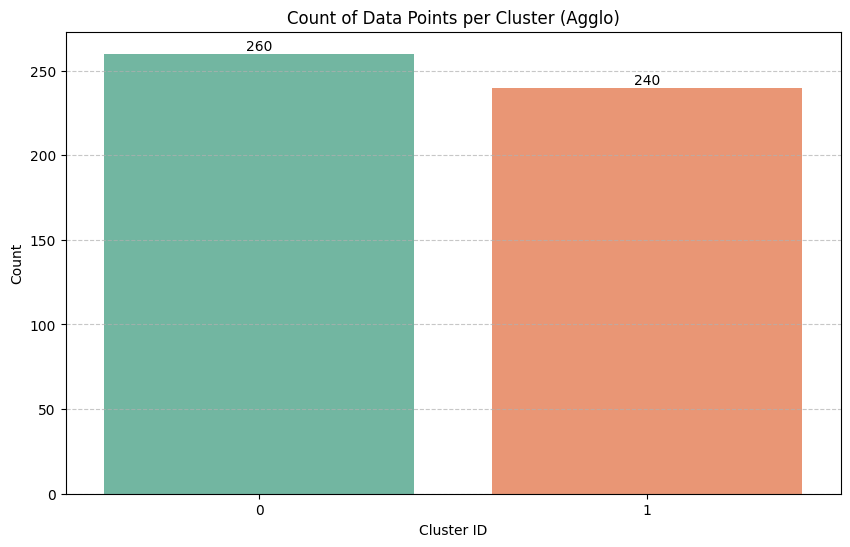

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df_encoded['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

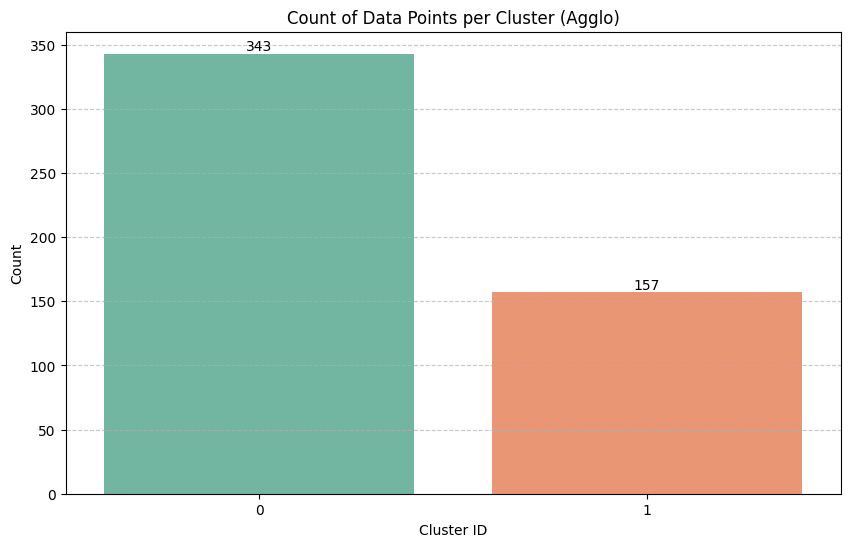

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df_scaled['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

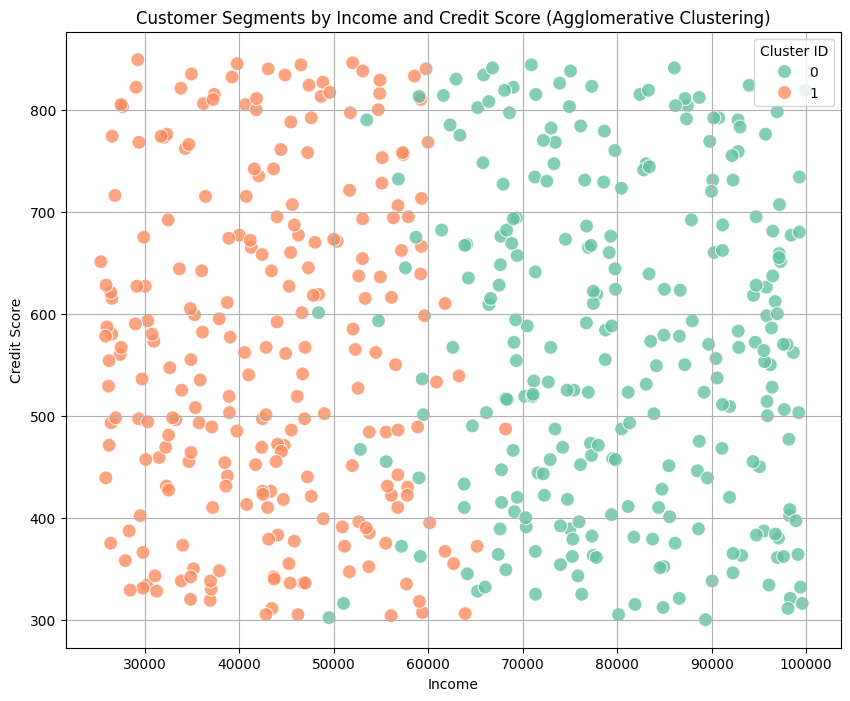

In [304]:
#Unscaled
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_encoded, x='Income', y='Credit_Score', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Income and Credit Score (Agglomerative Clustering)')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

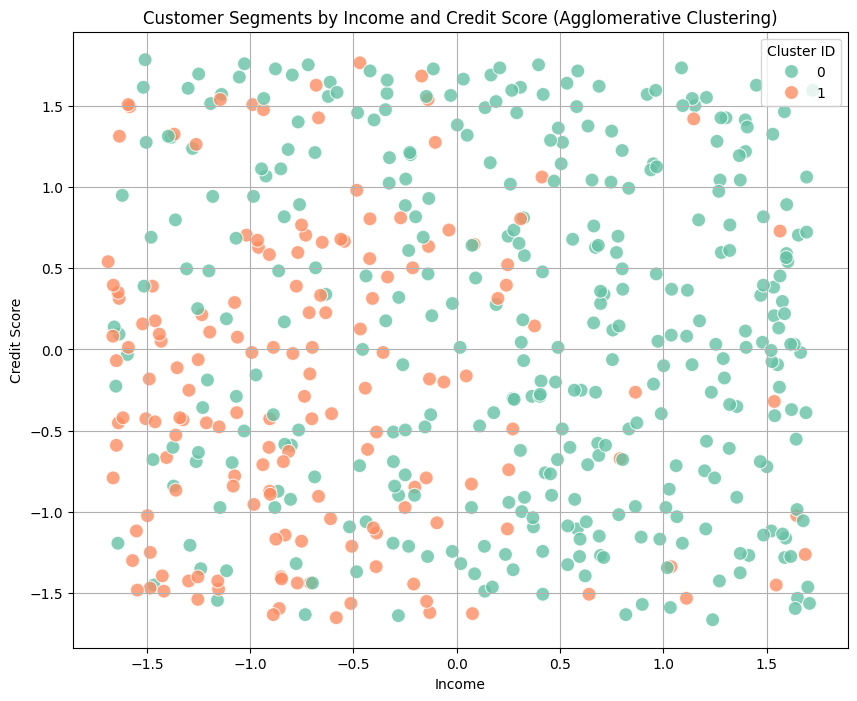

In [305]:
#Scaled
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_scaled, x='Income', y='Credit_Score', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Income and Credit Score (Agglomerative Clustering)')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [306]:
# Scaled
# Group the data by cluster and calculate descriptive statistics for each cluster
cluster_summary = df_encoded.groupby('Agglo').agg({
    'Income': ['mean', 'std', 'min', 'max'],
    'Age': ['mean', 'std', 'min', 'max'],
    'Education': ['mean', 'count'], # 'mean' for education will show average level
    'Credit_Score': ['mean', 'std', 'min', 'max'],
    'Years_with_Bank': ['mean', 'std', 'min', 'max'],
    'Transaction_Count': ['mean', 'std', 'min', 'max'],
    'Balance': ['mean', 'std', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'std', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'std', 'min', 'max'],
    'Purchase_Frequency': ['mean', 'std', 'min', 'max'],
    'Customer_Satisfaction': ['mean', 'std', 'min', 'max', 'count'],
    'Online_Activity': ['mean', 'std', 'min', 'max']
})

# Rename the index for clarity
cluster_summary = cluster_summary.rename_axis('Cluster ID')

# Set display options to show full table
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the summary
display(cluster_summary)

# Reset display options to default (optional, but good practice)
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

Income                                                Age  \
                    mean           std          min          max       mean   
Cluster ID                                                                    
0           80056.384759  12503.832639  48384.69115  99913.52549  40.007692   
1           42948.964656  10547.367150  25352.16071  68181.33715  40.012500   

                              Education       Credit_Score                   \
                  std min max      mean count         mean         std  min   
Cluster ID                                                                    
0           13.203191  18  64  1.423077   260   566.538462  157.920764  300   
1           12.912153  18  64  1.383333   240   563.316667  160.901565  304   

                Years_with_Bank                   Transaction_Count  \
            max            mean       std min max              mean   
Cluster ID                                                            
0           844       10.584615  5.328273   1  19         45.565385   
1           849       11.045833  4.951859   1  19         51.650000   

                                   Balance                         \
                  std min max         mean          std       min   
Cluster ID                                                          
0           28.988740   1  99  5307.329049  2834.343985  99.12599   
1           28.192747   1  99  4797.946011  3006.497695  44.90044   

                        Loan_Approval_Amount                             \
                    max                 mean           std          min   
Cluster ID                                                                
0           9984.440444         24079.854446  14514.079605  1087.318821   
1           9922.434546         26820.821008  13862.864650  1230.459555   

                        Credit_Card_Limit                            \
                    max              mean          std          min   
Cluster ID                                                            
0           49971.89523      10299.053313  5412.027733  1123.831875   
1           49820.52773      10946.801520  5733.062270  1017.345471   

                        Purchase_Frequency                                \
                    max               mean       std       min       max   
Cluster ID                                                                 
0           19659.11871           0.518549  0.287781  0.000813  0.993942   
1           19968.52056           0.506474  0.278011  0.001914  0.988192   

           Customer_Satisfaction                         Online_Activity  \
                            mean       std min max count            mean   
Cluster ID                                                                 
0                          2.600  1.101771   1   4   260        0.473096   
1                          2.525  1.101255   1   4   240        0.517722   

                                          
                 std       min       max  
Cluster ID                                
0           0.303305  0.001320  0.996199  
1           0.283389  0.001432  0.999897

In [307]:
# Scaled
# Group the data by cluster and calculate descriptive statistics for each cluster
cluster_summary = df_scaled.groupby('Agglo').agg({
    'Income': ['mean', 'std', 'min', 'max'],
    'Credit_Score': ['mean', 'std', 'min', 'max'],
    'Transaction_Count': ['mean', 'std', 'min', 'max'],
    'Balance': ['mean', 'std', 'min', 'max'],
    'Loan_Approval_Amount': ['mean', 'std', 'min', 'max'],
    'Credit_Card_Limit': ['mean', 'std', 'min', 'max'],
})
# Rename the index for clarity
cluster_summary = cluster_summary.rename_axis('Cluster ID')

# Set display options to show full table
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display the summary
display(cluster_summary)

# Reset display options to default (optional, but good practice)
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

Income                               Credit_Score            \
                mean       std       min       max         mean       std   
Cluster ID                                                                  
0           0.311155  0.942728 -1.658386  1.723192     0.109393  1.019700   
1          -0.679785  0.760788 -1.687691  1.687259    -0.238992  0.917496   

                               Transaction_Count                      \
                 min       max              mean       std       min   
Cluster ID                                                             
0          -1.666120  1.785682         -0.344175  0.920601 -1.653782   
1          -1.653545  1.766819          0.751924  0.719492 -1.653782   

                       Balance                                \
                 max      mean       std       min       max   
Cluster ID                                                     
0           1.759237  0.121976  0.984945 -1.704708  1.683474   
1           1.759237 -0.266482  0.986992 -1.716418  1.588582   

           Loan_Approval_Amount                                \
                           mean       std       min       max   
Cluster ID                                                      
0                      0.028068  1.003334 -1.706699  1.725528   
1                     -0.061320  0.996323 -1.696649  1.714900   

           Credit_Card_Limit                                
                        mean       std       min       max  
Cluster ID                                                  
0                  -0.134004  0.988100 -1.716010  1.625593  
1                   0.292761  0.968992 -1.723224  1.681174

In [308]:
#unscaled
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Age'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df_scaled['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

In [309]:
#unscaled
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Income'
y_col = 'Credit_Score'
z_col = 'Age'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df_encoded['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

## Part D – Segmentation & Managerial Implication

1. Model dengan data yang telah melalui proses scaling menghasilkan pemisahan cluster yang lebih seimbang dibandingkan dengan model unscaled. Pada data tanpa scaling, fitur dengan nilai besar seperti Income, Balance, dan Credit_Card_Limit mendominasi proses perhitungan jarak sehingga hasil pengelompokan menjadi kurang proporsional. Setelah dilakukan scaling, semua fitur berada pada skala yang sama sehingga kontribusinya terhadap pembentukan cluster menjadi lebih adil dan mampu mencerminkan karakteristik pelanggan secara menyeluruh.

2. Cluster 0 mencakup pelanggan dengan pendapatan menengah, skor kredit yang cukup stabil, serta aktivitas transaksi yang cukup tinggi. Mereka juga menunjukkan tingkat penggunaan layanan digital yang lebih aktif dibandingkan segmen lainnya. Secara umum, kelompok ini dapat digambarkan sebagai pelanggan yang aktif secara digital dan memiliki perilaku transaksi dinamis meskipun masih berada pada level ekonomi menengah.

Cluster 1 terdiri atas pelanggan dengan pendapatan dan saldo tinggi serta batas kartu kredit yang besar. Mereka memiliki skor kredit yang baik, kondisi finansial stabil, dan pola transaksi yang konsisten meskipun tidak terlalu sering. Kelompok ini merepresentasikan segmen nasabah bernilai tinggi dengan risiko rendah dan loyalitas yang kuat terhadap layanan bank.

Cluster 2 berisi pelanggan dengan pendapatan relatif rendah, saldo kecil, dan skor kredit yang cenderung rendah pula. Aktivitas transaksi mereka tidak terlalu tinggi dan penggunaan layanan digital masih terbatas. Secara umum, kelompok ini menggambarkan segmen pelanggan dengan keterlibatan rendah yang berpotensi untuk ditingkatkan melalui edukasi dan promosi produk dasar perbankan.

3. Untuk Cluster 0, strategi yang disarankan adalah meningkatkan keterlibatan digital melalui program loyalitas berbasis aplikasi, penawaran cashback, dan promosi transaksi online. Cluster 1 dapat difokuskan pada strategi retensi melalui layanan premium seperti priority banking, produk investasi, dan kartu kredit eksklusif. Sementara itu, Cluster 2 perlu didekati dengan program edukasi finansial, penawaran produk tabungan sederhana, serta promosi yang mendorong peningkatan penggunaan layanan digital. Dengan strategi yang disesuaikan untuk masing-masing segmen, bank dapat meningkatkan kepuasan, loyalitas, dan potensi pertumbuhan pelanggan secara berkelanjutan.